# 2D IR Spectroscopy

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import os

def num_oscill(n_modes):
    '''
    Calculates the number of oscillators n_oscill based on a 
    given number of modes n_modes. This is based on the assumption 
    that there are n_modes = 1 + 2n_oscill + (n_oscill*(n_oscill-1))/2 modes. 
    There is one ground state (0) plus n first excited states 
    plus n second excited states plus (n_oscill*(n_oscill-1))/2 combination states. 
    
    '''
    n_oscill = (-3. + np.sqrt(8.*n_modes +1.) ) /2.
    return n_oscill 

$$N = 1 + 2n + \frac{n*(n-1)}{2}$$
Number of energy levels $N$ with $n$ oscillators
(1 ground state + n oscillator modes + n first excited oscillator modes + (n*(n-1))/2 combination modes)
$$n = \frac{-3\pm\sqrt{8N+1}}{2}$$
but we only need the $n = \frac{-3+\sqrt{8N+1}}{2}$ solution! 

In [2]:
mol = 'uracil_3modes'

dip_mat = np.loadtxt('data/%s/intenmat.txt' %(mol))   #intenmat
elevelmat = np.loadtxt('data/%s/freqsmat.txt' %(mol)) #freqmat

e_level = elevelmat[0]
n_loc_moden = len(dip_mat)-1
n_oscill = int(num_oscill(len(dip_mat)))

print('Length dipole matrix: ', len(dip_mat))
print('Number of modes: ', n_loc_moden)
print('Number of oscillators ', n_oscill)
print('Energy levels:\n', e_level)
print('Dipole matrix:\n', dip_mat)


# if harmonic matrices are available: 

harm = None
if os.path.isfile('data/%s/intenmatharm.txt' %(mol)) and os.path.isfile('data/%s/freqsmatharm.txt' %(mol)):
    harm = True
    
    dip_math = np.loadtxt('data/%s/intenmatharm.txt' %(mol))
    elevelmath = np.loadtxt('data/%s/freqsmatharm.txt' %(mol))
    
    e_levelh = elevelmath[0]
    
    print()
    print('Harm. Length dipole matrix: ', len(dip_math))
    print('Harm. Energy levels:\n', e_levelh)
    print('Harm. Dipole matrix:\n', dip_math)
    
else:
    print ("\nHarmonic files do not exist.\n")

Length dipole matrix:  10
Number of modes:  9
Number of oscillators  3
Energy levels:
 [   0.         1688.42897947 1815.47533081 1852.52886991 3375.53242233
 3503.43635089 3540.4886873  3622.15997219 3666.48803456 3698.24884769]
Dipole matrix:
 [[ 0.00000000e+00  7.05439286e+01  6.03112902e+02  5.51709663e+02
   6.75760297e-01  3.43428616e-01  7.70002389e-02  5.23159081e+00
   8.77092757e-01  6.31320254e+00]
 [-7.05439286e+01  0.00000000e+00  9.38270526e-03  5.86108733e-03
   1.47618528e+02  6.04015381e+02  5.50414553e+02  3.41994033e-01
   8.28653684e-03  9.11543524e-03]
 [-6.03112902e+02 -9.38270526e-03  0.00000000e+00  1.23472169e-02
   1.24404282e-02  6.15192461e+01  3.96299606e-02  1.16565001e+03
   5.93551001e+02  8.78105759e-01]
 [-5.51709663e+02 -5.86108733e-03 -1.23472169e-02  0.00000000e+00
   1.45409515e-03  4.20153454e-02  7.11524621e+01  1.25053837e+00
   6.34695432e+02  1.05097173e+03]
 [-6.75760297e-01 -1.47618528e+02 -1.24404282e-02 -1.45409515e-03
   0.00000000e+00  9

In [3]:
def check_symmetric(a, tol=1e-5):
    '''
    Checks if a given matrix a is symmetric.
    Returns True/False.
    
    '''
    return np.all(np.abs(a-a.T) < tol)

print(check_symmetric(np.abs(dip_mat)))
print(check_symmetric(np.abs(elevelmat)))

if harm: 
    print(check_symmetric(np.abs(dip_math)))
    print(check_symmetric(np.abs(elevelmath)))

True
True
True
True


We calculate 1D IR spectra from given intensities and frequencies.
$$f_{g}(x) = b \cdot e^{a \cdot (x-x_0)^2}$$
with the intensity $b$, the position of the peak (frequency) $x_0$ and $a=0.1$.

In order to calculate the 1D IR spectrum we sum over all peaks
$$ f_{1D}(x) = \sum_{n=1}^n f_{g}(x) = \sum_{n=1}^n b_n \cdot e^{(a \cdot x-x_{0,n})^2}$$

In [4]:
def gauss(x,freq,ints):
    '''
    Returns a value for a gaussian function.
    
    '''
    return ints*np.exp(-0.1*(x-freq)**2)

def spectrum1d(xmin,xmax,steps,freq,ints):
    '''
    Sums over a len(freq) gaussian functions.
    Returns x and y values.
    
    '''
    x = np.linspace(xmin,xmax,steps)
    y = np.zeros(steps)
    
    for j in range(len(freq)):
        ys = []
        for i in range(steps):
            ys.append(gauss(x[i],freq[j],ints[j]))
            y[i] = y[i] + ys[i]
    return x,y

### Plotting the 1D IR spectrum

Text(0, 0.5, 'intensity')

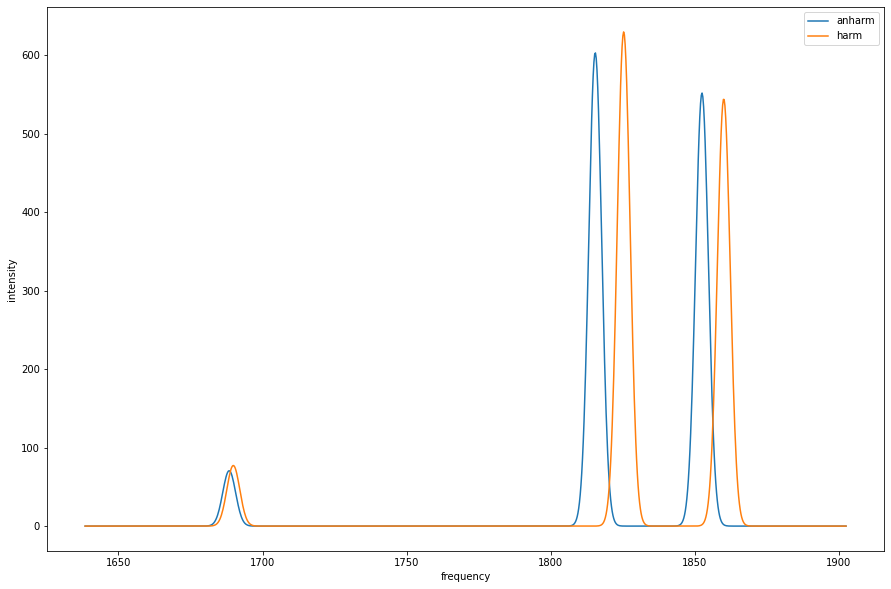

In [5]:
xmin = e_level[1]-50
xmax = e_level[n_oscill]+50
steps = 1000

x_1d,y_1d = spectrum1d(xmin,xmax,steps,e_level,dip_mat[0])
if harm: 
    x_1dh,y_1dh = spectrum1d(xmin,xmax,steps,e_levelh,dip_math[0])

plt.figure(figsize=(15,10))
plt.plot(x_1d,y_1d,label='anharm')
if harm:
    plt.plot(x_1dh,y_1dh,label='harm')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('intensity')

### Plotting the energy levels

anharmonic energy levels:
 [   0.         1688.42897947 1815.47533081 1852.52886991 3375.53242233
 3503.43635089 3540.4886873  3622.15997219 3666.48803456 3698.24884769] 

harmonic energy levels:
 [   0.         1689.86023148 1825.356436   1860.08949542 3379.0927232
 3515.15095387 3549.8201129  3650.08297424 3685.25493159 3719.51532358] 



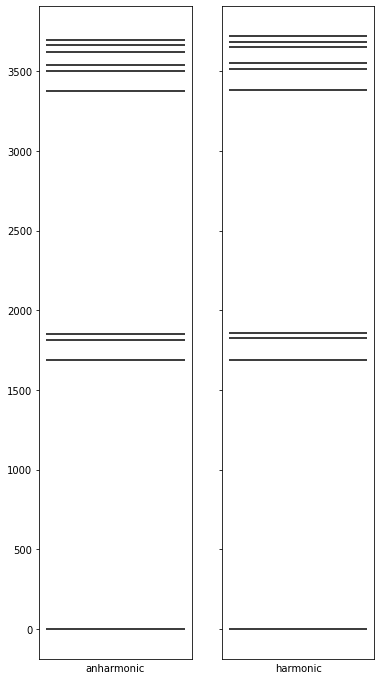

In [6]:
print('anharmonic energy levels:\n', e_level,'\n')
if harm:
    print('harmonic energy levels:\n', e_levelh,'\n')

plt.figure(figsize=(6,12))
ax1 = plt.subplot(1,2,1)
ax1.hlines(e_level,0,1)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.tick_params(bottom=False, top=False, left=True, right=False)
plt.xlabel('anharmonic')
if harm:
    ax2 = plt.subplot(1,2,2,sharey=ax1)
    plt.hlines(e_levelh,0,1)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    ax2.tick_params(bottom=False, top=False, left=True, right=False)
    plt.xlabel('harmonic')

In [7]:
def calc_excitation(e_level,int_mat,n_oscill):
    '''
    Takes the energy levels and the intensity matrix in order to find 
    the excited state absorption processes that occur in an 2D IR
    experiment. 
    
    '''
    exc_x = [] # excitation coords
    exc_y = [] 
    exc_i = [] # intensity

    for i in range(len(int_mat)):
        if int_mat[0][i] and i<=n_oscill:
            for j in range(len(int_mat)):
                if j>i:
                    
                    y_coor = e_level[j]-e_level[i]
                    x_coor = e_level[i]-e_level[0]
                    exc_inten = int_mat[i][j]
                    
                    exc_y.append(y_coor)
                    exc_x.append(x_coor)
                    exc_i.append(exc_inten)
                    
                    print('Excitation from energy level',i,'to',j,'at (',x_coor,',',y_coor,') rcm and intensity: ',exc_inten)
    return exc_x, exc_y, exc_i

def calc_stimulatedemission(e_level,int_mat,n_oscill):
    '''
    Takes the energy levels and the intensity matrix in order to find
    the stimulated emission processes that occur in an 2D IR experiment.
    In order to match the experiment the stimulated emission can only 
    happen in transition to the ground state energy level!
    
    '''
    emi_x = [] # excitation coords
    emi_y = [] 
    emi_i = [] # intensity

    for i in range(len(int_mat)):
        for j in range(len(int_mat)):
            if j==0 and i>j and i<=n_oscill:

                y_coor = e_level[i]-e_level[j]
                x_coor = e_level[i]-e_level[j]
                emi_inten = int_mat[j][i]

                emi_y.append(y_coor)
                emi_x.append(x_coor)
                emi_i.append(emi_inten)

                print('Stimulated emission from energy level',i,'to',j,'at (',x_coor,',',y_coor,') rcm and intensity: ',emi_inten)
    return emi_x, emi_y, emi_i

def calc_bleaching(e_level,int_mat,n_oscill):
    '''
    Takes the energy levels and the intensity matrix in order to find
    the bleaching processes that occur in an 2D IR experiment.
    
    '''
    
    ble_x = [] # excitation coords
    ble_y = [] 
    ble_i = [] # intensity

    for i in range(len(int_mat)):
        if int_mat[0][i] != 0 and i<=n_oscill:
                    
            x_coor = e_level[i]-e_level[0]
            y_coor = e_level[i]-e_level[0]
            ble_x.append(x_coor)
            ble_y.append(y_coor)
            ble_inten = int_mat[0][i]
            ble_i.append(ble_inten)
            print('Bleaching from energy level 0 to',i,'at (',x_coor,',',y_coor,') rcm and intensity: ',ble_inten)

            x_coor = e_level[i]-e_level[0]
            y_coor = e_level[i+1]-e_level[0]
            ble_x.append(x_coor)
            ble_y.append(y_coor)
            ble_inten = int_mat[0][i+1]
            ble_i.append(ble_inten)
            print('Bleaching from energy level 0 to',i+1,'at (',x_coor,',',y_coor,') rcm and intensity: ',ble_inten)

            x_coor = e_level[i+1]-e_level[0]
            y_coor = e_level[i]-e_level[0]
            ble_x.append(x_coor)
            ble_y.append(y_coor)
            ble_inten = int_mat[0][i]
            ble_i.append(ble_inten)
            print('Bleaching from energy level 0 to',i,'at (',x_coor,',',y_coor,') rcm and intensity: ',ble_inten)

            x_coor = e_level[i+1]-e_level[0]
            y_coor = e_level[i+1]-e_level[0]
            ble_x.append(x_coor)
            ble_y.append(y_coor)
            ble_inten = int_mat[0][i+1]
            ble_i.append(ble_inten)
            print('Bleaching from energy level 0 to',i+1,'at (',x_coor,',',y_coor,') rcm and intensity: ',ble_inten)
    return ble_x, ble_y, ble_i

def calc_2dir(e_level,int_mat,n_oscill):
    '''
    Calculates all processes that can occur within a
    2D IR experiment from the energy levels and the
    intensity matrix. 
    
    '''
    exc_x, exc_y, exc_i = calc_excitation(e_level,int_mat,n_oscill)
    emi_x, emi_y, emi_i = calc_stimulatedemission(e_level,int_mat,n_oscill)
    ble_x, ble_y, ble_i = calc_bleaching(e_level,int_mat,n_oscill)
    return exc_x, exc_y, exc_i, emi_x, emi_y, emi_i, ble_x, ble_y, ble_i

In [8]:
exc_x, exc_y, exc_i, emi_x, emi_y, emi_i, ble_x, ble_y, ble_i = calc_2dir(e_level,dip_mat,n_oscill)

if harm:
    print()
    print('harmonic:')
    exc_xh, exc_yh, exc_ih, emi_xh, emi_yh, emi_ih, ble_xh, ble_yh, ble_ih = calc_2dir(e_levelh,dip_math,n_oscill)

Excitation from energy level 1 to 2 at ( 1688.4289794672309 , 127.04635133896682 ) rcm and intensity:  0.009382705262952715
Excitation from energy level 1 to 3 at ( 1688.4289794672309 , 164.09989043791666 ) rcm and intensity:  0.005861087328320292
Excitation from energy level 1 to 4 at ( 1688.4289794672309 , 1687.1034428652092 ) rcm and intensity:  147.61852773967817
Excitation from energy level 1 to 5 at ( 1688.4289794672309 , 1815.007371424077 ) rcm and intensity:  604.0153813107627
Excitation from energy level 1 to 6 at ( 1688.4289794672309 , 1852.059707836681 ) rcm and intensity:  550.4145526127089
Excitation from energy level 1 to 7 at ( 1688.4289794672309 , 1933.7309927268961 ) rcm and intensity:  0.3419940325112202
Excitation from energy level 1 to 8 at ( 1688.4289794672309 , 1978.0590550948027 ) rcm and intensity:  0.008286536837868237
Excitation from energy level 1 to 9 at ( 1688.4289794672309 , 2009.8198682273787 ) rcm and intensity:  0.00911543523870592
Excitation from energ

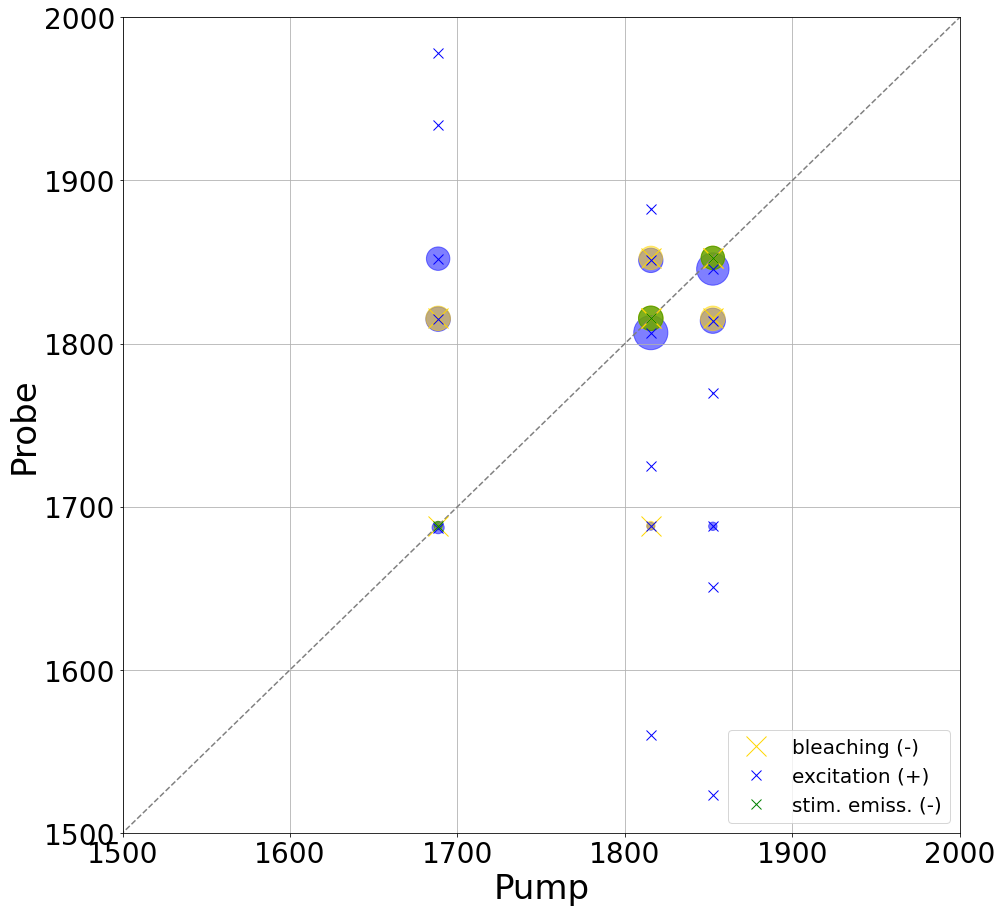

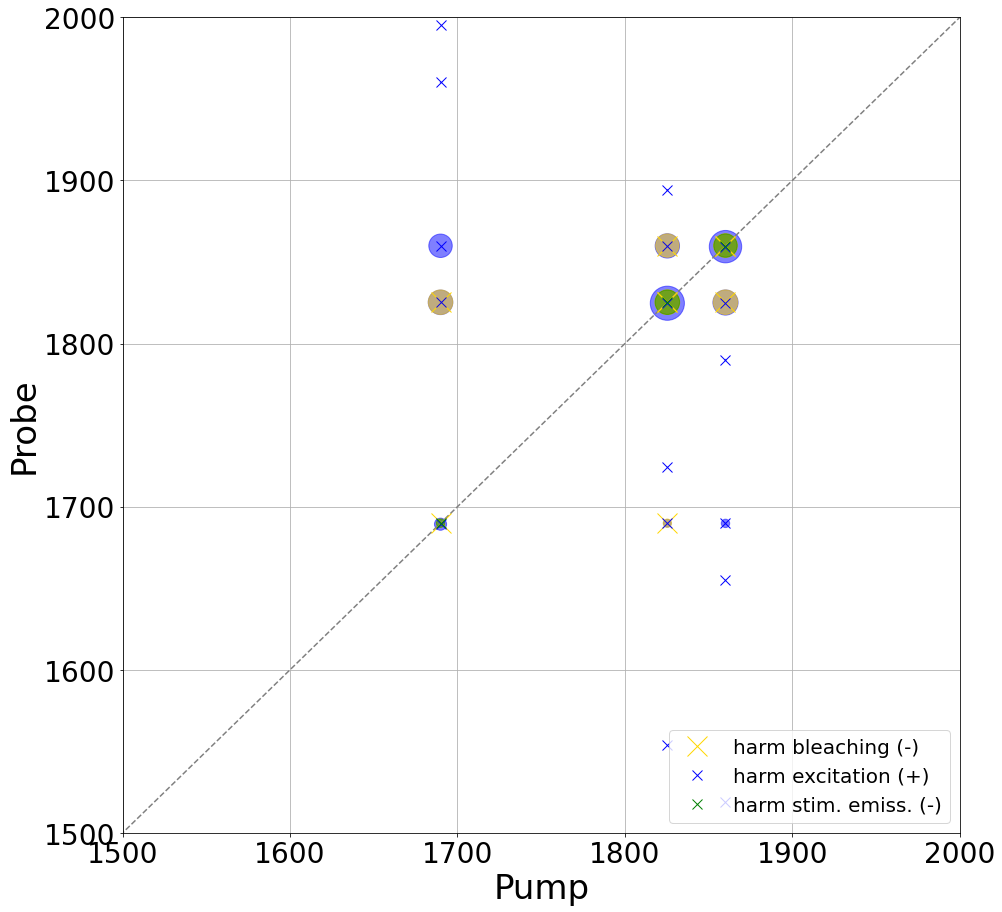

In [9]:
newmin = 1500
newmax = 2000

plt.figure(figsize=(15,15))
plt.plot([0,newmax], [0,newmax], ls="--", c=".5")
plt.plot(ble_x,ble_y, "x", color='gold', label='bleaching (-)', markersize=20)
plt.plot(exc_x,exc_y, "bx", label='excitation (+)', markersize=10)
plt.plot(emi_x,emi_y, "gx", label='stim. emiss. (-)', markersize=10)
plt.scatter(exc_x,exc_y,s=exc_i, color='b', alpha=0.5)
plt.scatter(ble_x,ble_y,s=ble_i, color='gold', alpha=0.5)
plt.scatter(emi_x,emi_y,s=emi_i, color='g', alpha=0.5)
plt.xlim(newmin,newmax)
plt.ylim(newmin,newmax)
plt.grid(True)
plt.ylabel('Probe',fontsize=34)
plt.xlabel('Pump',fontsize=34)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=20,loc='lower right')
#plt.savefig('Bilder/%s_CO_anharm.png' %(mol),bbox_inches='tight')

if harm: 
    plt.figure(figsize=(15,15))
    plt.plot([0,newmax], [0,newmax], ls="--", c=".5")
    plt.plot(ble_xh,ble_yh, "x", color='gold', label='harm bleaching (-)', markersize=20)
    plt.plot(exc_xh,exc_yh, "bx", label='harm excitation (+)', markersize=10)
    plt.plot(emi_xh,emi_yh, "gx", label='harm stim. emiss. (-)', markersize=10)
    plt.scatter(exc_xh,exc_yh,s=exc_i, color='b', alpha=0.5)
    plt.scatter(ble_xh,ble_yh,s=ble_i, color='gold', alpha=0.5)
    plt.scatter(emi_xh,emi_yh,s=emi_i, color='g', alpha=0.5)
    plt.xlim(newmin,newmax)
    plt.ylim(newmin,newmax)
    plt.grid(True)
    plt.ylabel('Probe',fontsize=34)
    plt.xlabel('Pump',fontsize=34)
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)
    plt.legend(fontsize=20,loc='lower right')
    #plt.savefig('Bilder/%s_CO_harm.png' %(mol),bbox_inches='tight')

## Fitting lorentz functions 

$$f_{l}(x,y) = b \cdot \frac{1}{2 \pi} \cdot \frac{1}{ (x-x_0)^2 + (y-y_0)^2 + a}$$
with the intensity $b$, the position of the peak (frequency) $x_0$ and $y_0$ and $a=100$.

In order to calculate the 2D IR spectrum we sum over all peaks
$$ f_{2D}(x,y) = \sum^n_{n=1} f_{l}(x,y) = \sum^n_{n=1} b_n \cdot \frac{1}{2 \pi} \cdot \frac{1}{ (x-x_{0,n})^2 + (y-y_{0,n})^2 + a} $$
with the number of peaks $n$

In [10]:
def lorentz(ints,x,x0,y,y0):
    '''
    Returns a value for a 2D lorentzian function.
    
    '''
    return (ints)/(2*np.pi) * 1/( ((x-x0)**2 + (y-y0)**2 + 100 ) )

def sum_lorentz(dim,x_val,y_val,intensity,xx,yy):
    '''
    Takes the number of data points dim, peaks (x_val and y_val)
    the intensities and the meshgrid xx,yy and calculates the 2D
    lorentian function on the given grid. 
    
    '''
    z_val = np.zeros((dim,dim))
    for i in range(len(x_val)):
        z_val += lorentz(intensity[i],xx,x_val[i],yy,y_val[i])
    return z_val

In [11]:
dim = 500

lorentzmin = newmin
lorentzmax = newmax

x = np.linspace(lorentzmin, lorentzmax, dim)
y = np.linspace(lorentzmin, lorentzmax, dim)
xx, yy = np.meshgrid(x, y)

exc_z = sum_lorentz(dim,exc_x,exc_y,exc_i,xx,yy)
ble_z = sum_lorentz(dim,ble_x,ble_y,ble_i,xx,yy)
emi_z = sum_lorentz(dim,emi_x,emi_y,emi_i,xx,yy)

z = np.zeros((dim,dim))
z += exc_z - ble_z - emi_z

exc_zh = sum_lorentz(dim,exc_xh,exc_yh,exc_ih,xx,yy)
ble_zh = sum_lorentz(dim,ble_xh,ble_yh,ble_ih,xx,yy)
emi_zh = sum_lorentz(dim,emi_xh,emi_yh,emi_ih,xx,yy)

zh = np.zeros((dim,dim))
zh += exc_zh - ble_zh - emi_zh

In [12]:
def find_minmax(z):
    '''
    Searches for the highest absolute value.
    (Needed for plotting: sets the vmax/vmin values when 
     using the contourf plot)
    
    '''
    print(np.asarray(z).min(),np.asarray(z).max())
    if abs(np.asarray(z).max()) > abs(np.asarray(z).min()):
        z_val = abs(np.asarray(z).max())
        print('chose max: ', z_val)
    if abs(np.asarray(z).max()) < abs(np.asarray(z).min()):
        z_val = abs(np.asarray(z).min())
        print('chose min ', z_val)
    return z_val

z_val = find_minmax(z)
z_valh = find_minmax(zh)

-1.9126831344664545 0.8643312167329826
chose min  1.9126831344664545
-1.0450105545551163 0.8561959431107303
chose min  1.0450105545551163


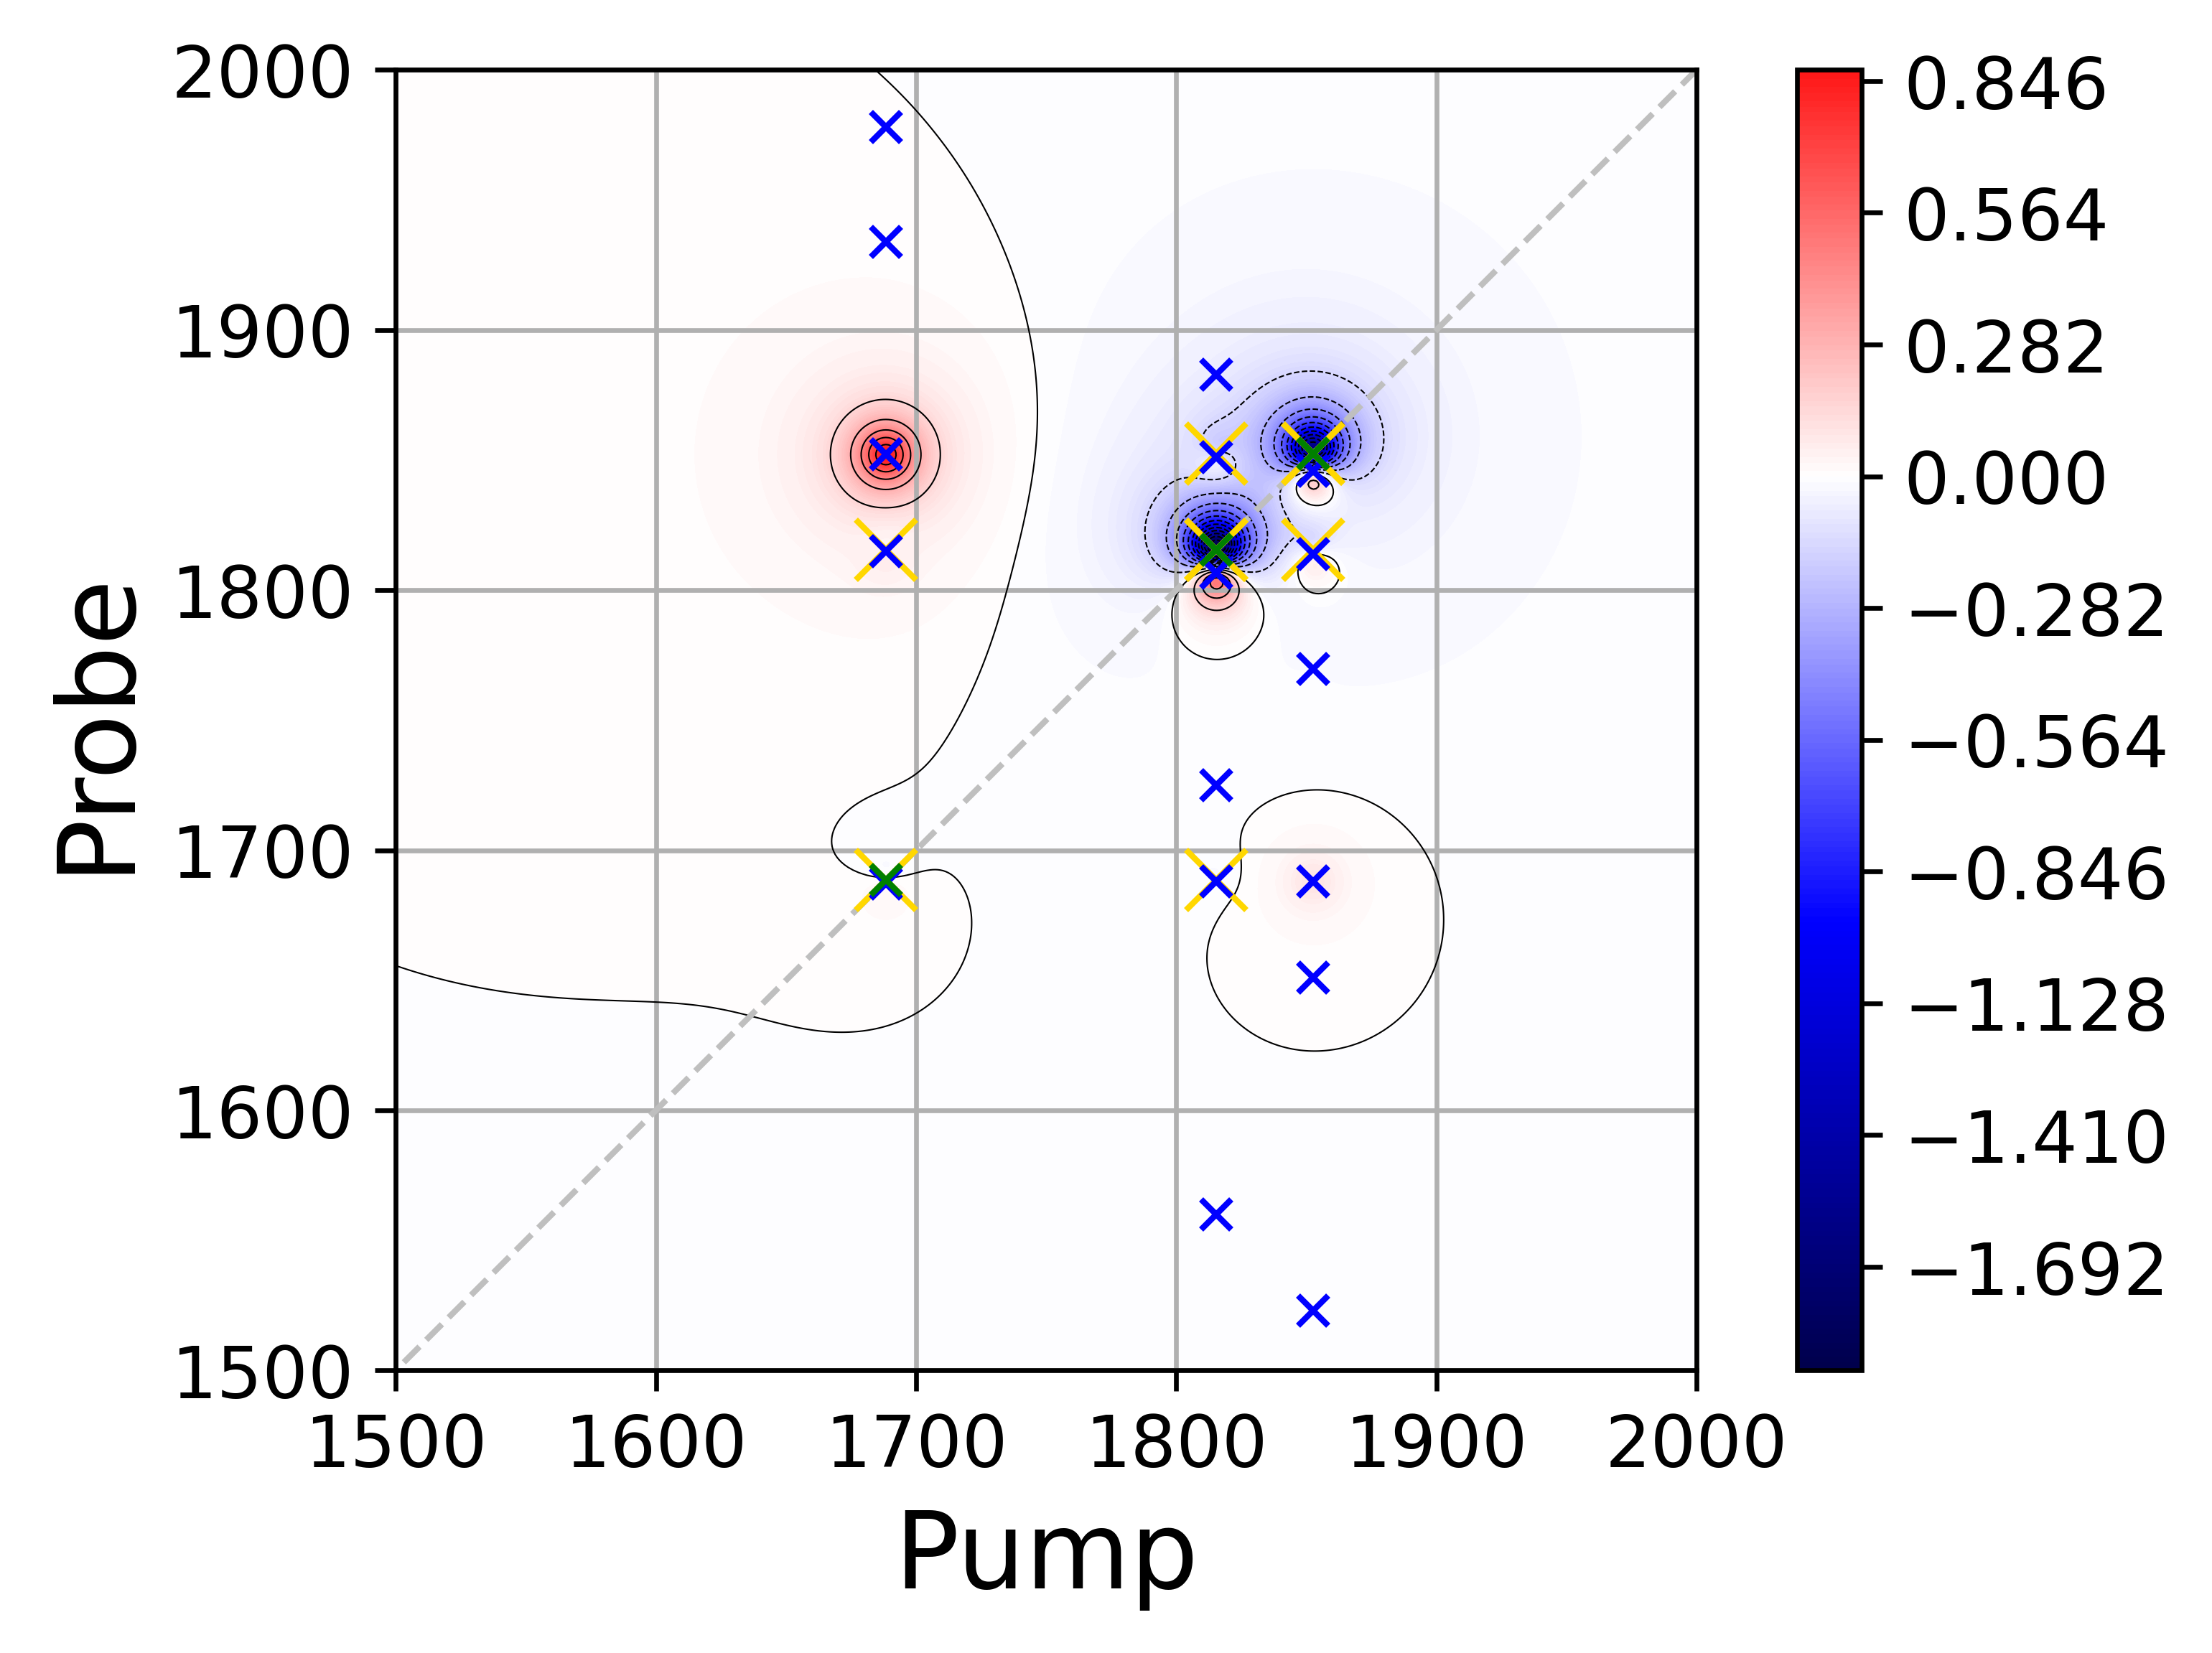

In [13]:
# PLOT THE ANHARMONIC 2D IR SPECTRUM

fig, ax = plt.subplots(dpi=600)
plt.plot([0,lorentzmax], [0,lorentzmax], ls="--", c="0.75", linewidth=1)

plt.grid(True)
ax.set_aspect(1./ax.get_data_ratio())

fig = plt.contourf(x,y,z, 500, alpha=1, cmap=plt.cm.seismic, vmax=z_val, vmin=-z_val)
CS = plt.contour(x,y,z,25,colors='k',linewidths=.25)

cbar = plt.colorbar(fig)
cbar.ax.tick_params(labelsize=12)
ax.tick_params(labelsize=12)
plt.xlabel('Pump', fontsize=18)
plt.ylabel('Probe', fontsize=18)
plt.xlim(lorentzmin,lorentzmax)
plt.ylim(lorentzmin,lorentzmax)

plt.plot(ble_x,ble_y, "x", color='gold', label='bleaching', markersize=10)
plt.plot(exc_x,exc_y, "bx", label='excitation', markersize=5)
plt.plot(emi_x,emi_y, "gx", label='stim. emiss.', markersize=5)


#plt.savefig('%s_CO_lorentz1.png' %(mol),bbox_inches='tight')

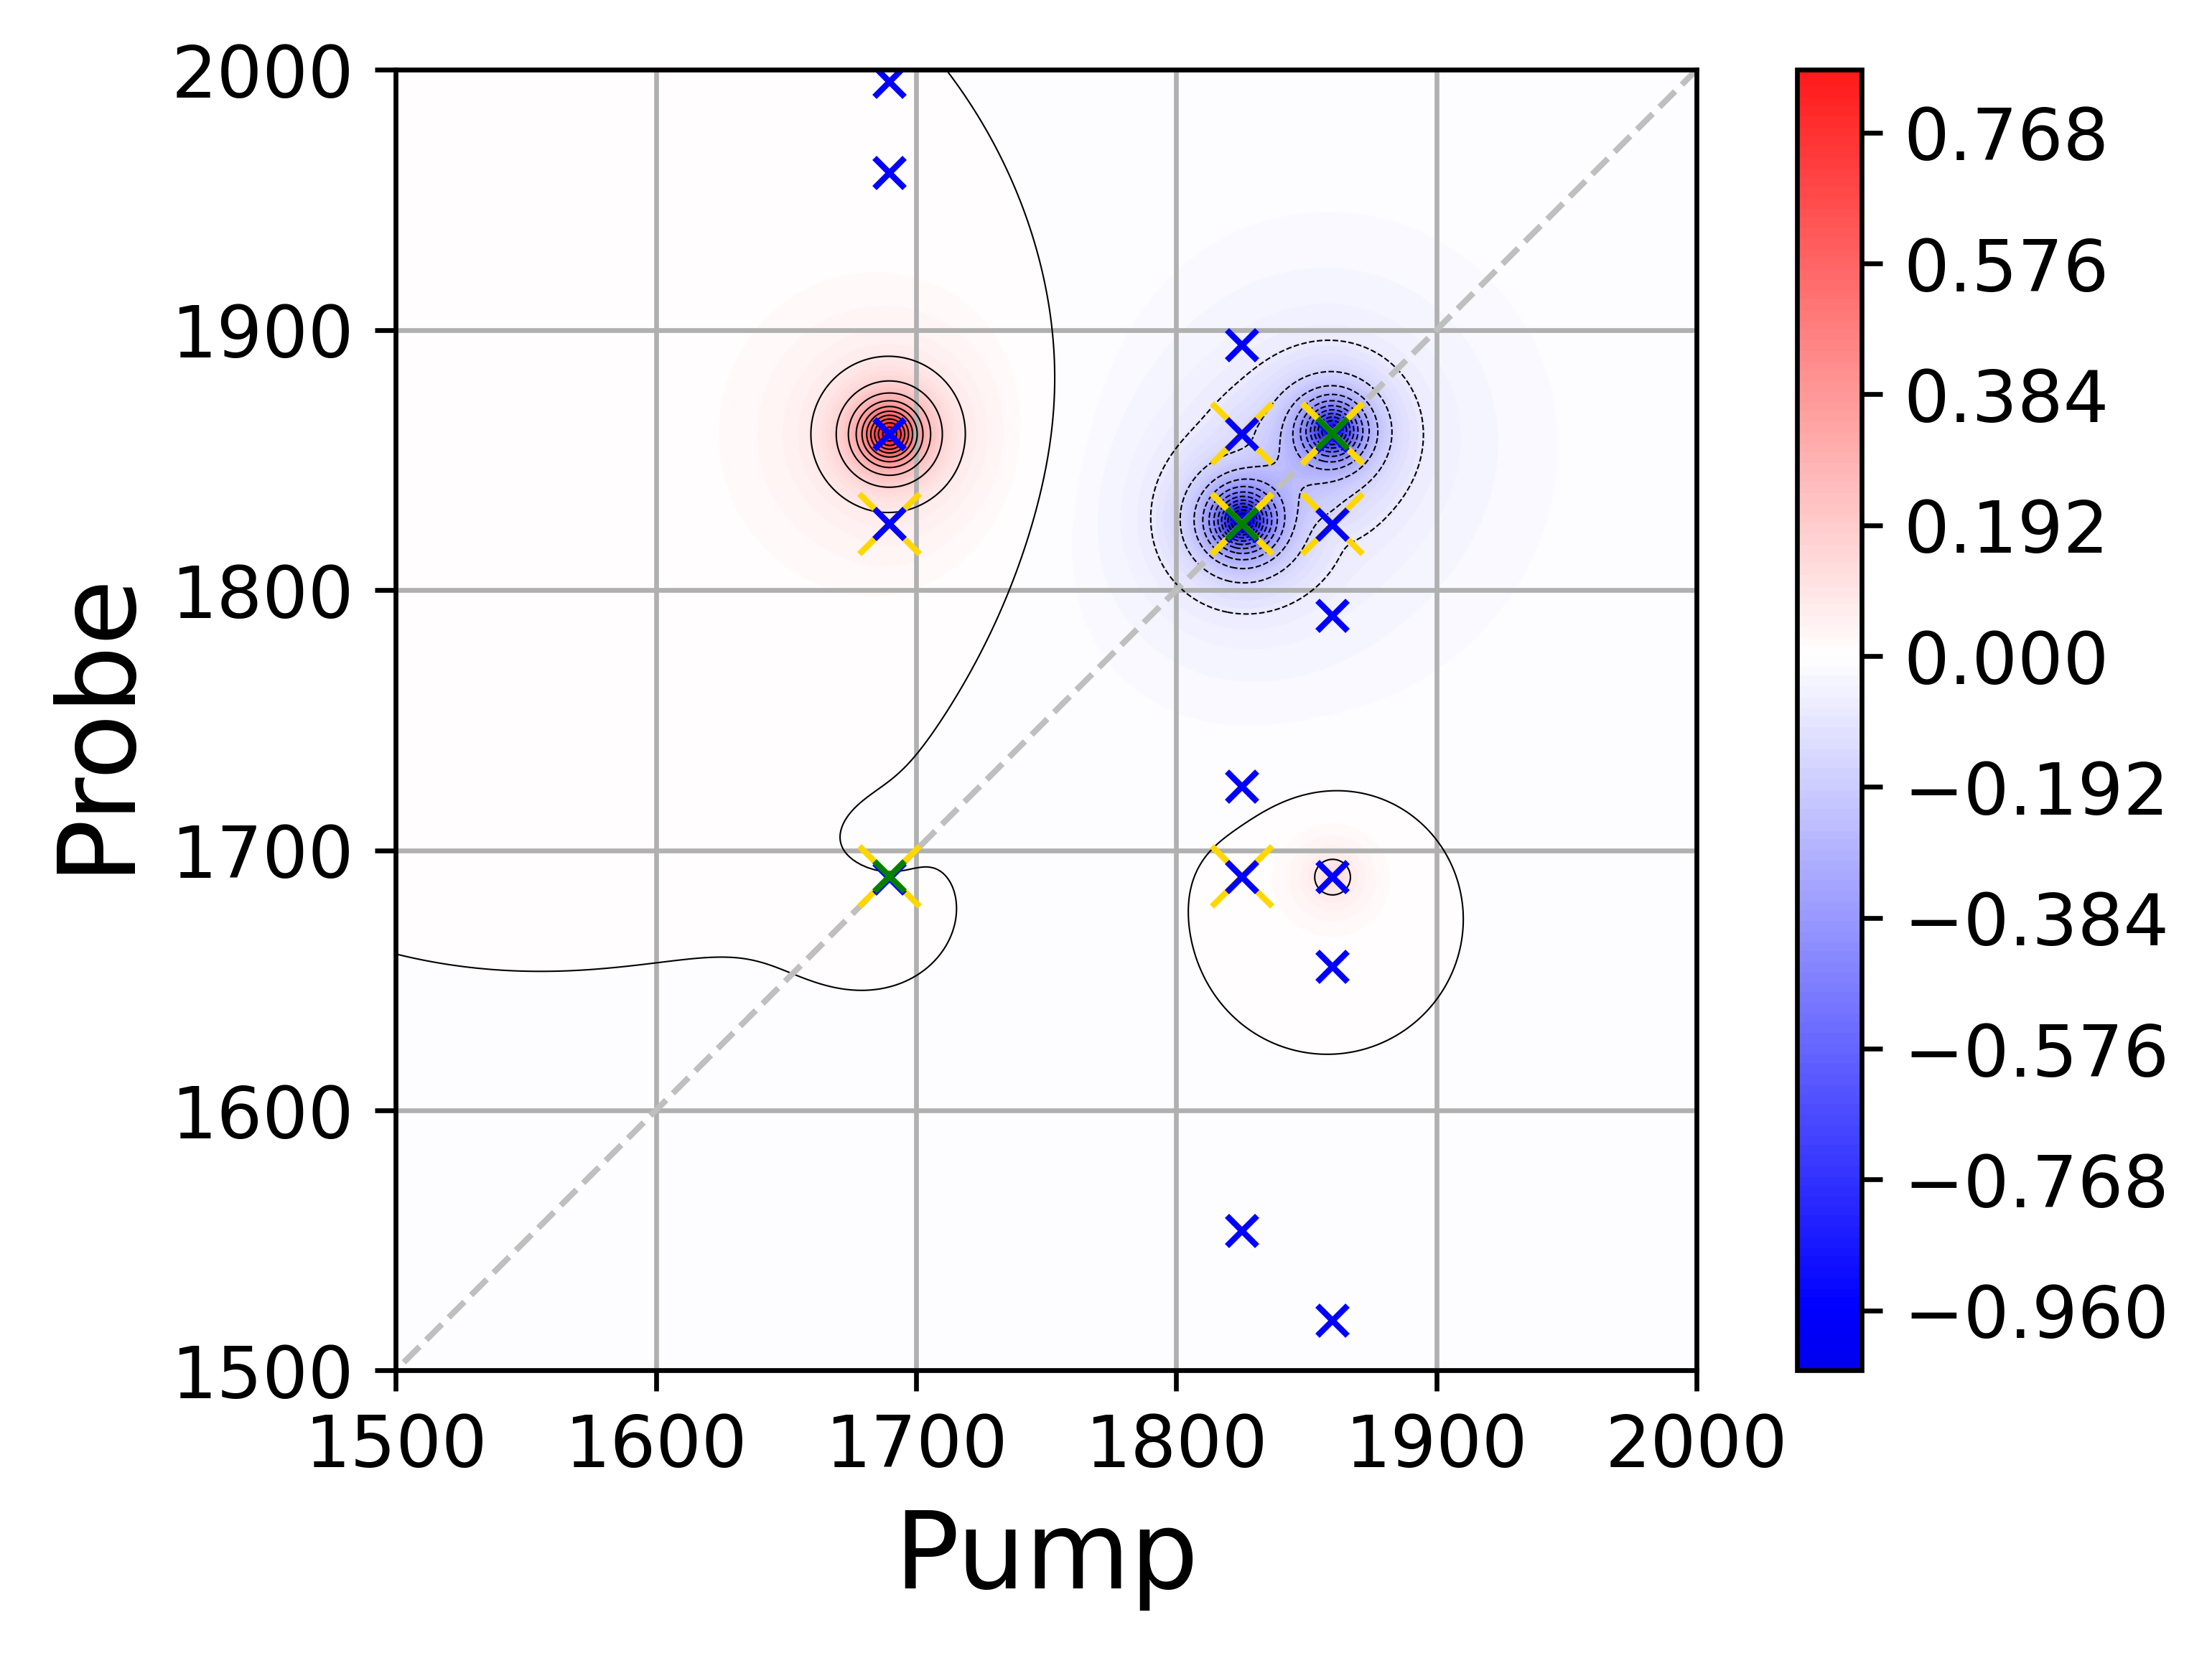

In [14]:
if harm:
    # PLOT THE HARMONIC 2D IR SPECTRUM

    fig, ax = plt.subplots(dpi=600)
    plt.plot([0,lorentzmax], [0,lorentzmax], ls="--", c="0.75", linewidth=1)

    fig = plt.contourf(x,y,zh, 500, alpha=1, cmap=plt.cm.seismic, vmax=z_val, vmin=-z_val)
    CS = plt.contour(x,y,zh,25,colors='k',linewidths=.25)

    plt.grid(True)
    ax.set_aspect(1./ax.get_data_ratio())
    cbar = plt.colorbar(fig)
    cbar.ax.tick_params(labelsize=12)
    ax.tick_params(labelsize=12)
    plt.xlabel('Pump', fontsize=18)
    plt.ylabel('Probe', fontsize=18)
    plt.xlim(lorentzmin,lorentzmax)
    plt.ylim(lorentzmin,lorentzmax)

    plt.plot(ble_xh,ble_yh, "x", color='gold', label='harm bleaching', markersize=10)
    plt.plot(exc_xh,exc_yh, "bx", label='harm excitation', markersize=5)
    plt.plot(emi_xh,emi_yh, "gx", label='harm stim. emiss.', markersize=5)


    #plt.savefig('%s_CO_lorentz_harm1.png' %(mol),bbox_inches='tight')